In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [51]:
df=pd.read_excel('Data_Train.xlsx')

In [52]:
df2=pd.read_excel('Data_Test.xlsx')

In [53]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [54]:
df.shape

(7628, 2)

In [55]:
df2.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [56]:
df2.shape

(2748, 1)

In [57]:
'''j=0
for i in df2.STORY:
    print(len(i))
    j=j+1
    if(j==20):
        break'''

'j=0\nfor i in df2.STORY:\n    print(len(i))\n    j=j+1\n    if(j==20):\n        break'

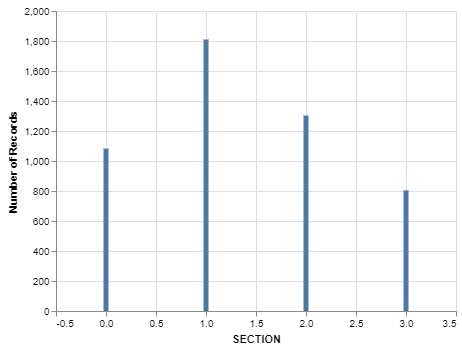

In [58]:
alt.Chart(df.loc[1:5000]).mark_bar().encode(
x=alt.X('SECTION'),    
y='count()'    
)
#base.encode(x='cool')|base.encode(x='useful')|base.encode(x='funny')

In [59]:
df.shape

(7628, 2)

In [60]:
X=df.STORY
y=df.SECTION

In [61]:
X.head()

0    But the most painful was the huge reversal in ...
1    How formidable is the opposition alliance amon...
2    Most Asian currencies were trading lower today...
3    If you want to answer any question, click on ‘...
4    In global markets, gold prices edged up today ...
Name: STORY, dtype: object

In [62]:
from sklearn.cross_validation import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5721,)
(1907,)
(5721,)
(1907,)


In [65]:
y_train.value_counts()

1    2077
2    1423
0    1282
3     939
Name: SECTION, dtype: int64

In [66]:
X_train.head()

5733    We knew we had that skill set required to do t...
6985    Blank is about an intelligence officer, played...
1323    We kept it private for a while and were waitin...
5648    Brent for May settlement rose 12 cents to $68....
1859    The Rift S requires a PC connection to power i...
Name: STORY, dtype: object

In [67]:
k=string.punctuation
k

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
import re

In [69]:
def remove_punc(text):
    text_nopun="".join([char for char in text if char not in string.punctuation])
    return(text_nopun)

X_train=(X_train.apply(lambda x: remove_punc(x)))

In [70]:
train_data=pd.DataFrame({'story':X_train,'section':y_train})

In [71]:
def remove_punc(text):
    text_nopun="".join([char for char in text if char not in string.punctuation])
    return(text_nopun)

X_test=(X_test.apply(lambda x: remove_punc(x)))

In [72]:
val_data=pd.DataFrame({'story':X_test,'section':y_test})

In [73]:
train_data.head()

,story,section
5733,We knew we had that skill set required to do t...,2
6985,Blank is about an intelligence officer played ...,2
1323,We kept it private for a while and were waitin...,2
5648,Brent for May settlement rose 12 cents to 6809...,3
1859,The Rift S requires a PC connection to power i...,1


In [74]:
val_data.head()

,story,section
683,The Internet of Things IoT especially in indus...,1
1964,The model code of conduct will be in place til...,0
4149,JVCs new lineup consists of four Full HD smart...,1
3378,NEW DELHI The Congress on Monday night release...,0
4500,It cleans the air in your room pretty fast and...,1


In [75]:
df2.STORY=(df2.STORY.apply(lambda x: remove_punc(x)))

In [76]:
j=0
for i in df2.STORY:
    print(len(i))
    j=j+1
    if(j==20):
        break

1521
249
1572
792
1244
480
1123
1224
219
415
1311
262
133
388
294
388
548
304
797
355


In [77]:
stop_words=nltk.corpus.stopwords.words('english')
print(len(stop_words))
print(stop_words[0:150:10])

179
['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're']


In [78]:
 def tokenise(text):
        tokenised_reviews=re.split('\W+',text)
        return(tokenised_reviews)  
    
train_data.story=train_data.story.apply(lambda x: tokenise(x))    
val_data.story=val_data.story.apply(lambda x: tokenise(x))
df2.STORY=df2.STORY.apply(lambda x: tokenise(x))

In [79]:
j=0
for i in df2.STORY:
    print(len(i))
    j=j+1
    if(j==20):
        break

241
46
271
133
222
82
193
212
39
69
215
48
22
68
59
72
85
48
133
62


In [80]:
def remove_stopwords(text):
    no_stop_words=[word for word in text if word not in stop_words]
    return(no_stop_words)

train_data.story=train_data.story.apply(lambda x: remove_stopwords(x))
val_data.story=val_data.story.apply(lambda x: remove_stopwords(x))
df2.STORY=df2.STORY.apply(lambda x: remove_stopwords(x))

In [81]:
j=0
for i in df2.STORY:
    print(len(i))
    j=j+1
    if(j==20):
        break

162
24
157
77
129
50
136
127
23
41
141
27
16
47
28
40
61
35
92
37


In [82]:
df2.head()

,STORY
0,"[2019, see, gadgets, like, gaming, smartphones..."
1,"[It, also, unleashed, wave, changes, MCU, make..."
2,"[It, confusing, pick, right, smartphone, segre..."
3,"[The, mobile, application, integrated, dashboa..."
4,"[We, rounded, gadgets, showed, 2018, left, ind..."


In [83]:
ps=nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [84]:
wn=nltk.WordNetLemmatizer()

In [85]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
'''def stemming(text):
    lem_reviews=" ".join([ps.stem(word) for word in text])
    return(lem_reviews)

min_max_df['stemmed_reviews']=min_max_df.no_stopwords_reviews.apply(lambda x: stemming(x))'''

'def stemming(text):\n    lem_reviews=" ".join([ps.stem(word) for word in text])\n    return(lem_reviews)\n\nmin_max_df[\'stemmed_reviews\']=min_max_df.no_stopwords_reviews.apply(lambda x: stemming(x))'

In [88]:
def lemmetise(text):
    lem_reviews=" ".join([(wn.lemmatize(word)) for word in text])
    return(lem_reviews)

train_data.story=train_data.story.apply(lambda x: lemmetise(x))
val_data.story=val_data.story.apply(lambda x: lemmetise(x))
df2.STORY=df2.STORY.apply(lambda x: lemmetise(x))

In [89]:
train_data.head()

,story,section
5733,We knew skill set required movie even though p...,2
6985,Blank intelligence officer played Deol nab ter...,2
1323,We kept private waiting right time announce pe...,2
5648,Brent May settlement rose 12 cent 6809 Londonb...,3
1859,The Rift S requires PC connection power higher...,1


In [48]:
df2.head()

,STORY
0,2019 see gadget like gaming smartphones wearab...
1,It also unleashed wave change MCU make sure fu...
2,It confusing pick right smartphone segregated ...
3,The mobile application integrated dashboard co...
4,We rounded gadget showed 2018 left indelible m...


In [45]:
'''def remove_digit(text):
    text=re.sub('\d+',"",text)
    return(text)
min_max_df['no_digit_stemmed']=min_max_df.stemmed_reviews.apply(lambda x: remove_digit(x))'''

'def remove_digit(text):\n    text=re.sub(\'\\d+\',"",text)\n    return(text)\nmin_max_df[\'no_digit_stemmed\']=min_max_df.stemmed_reviews.apply(lambda x: remove_digit(x))'

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf=TfidfVectorizer(ngram_range=(2,2))

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
count_vec=CountVectorizer(ngram_range=(2,2))

In [95]:
train_data.shape

(5721, 2)

In [96]:
X_train=train_data.story
y_train=train_data.section


In [97]:
X_test=val_data.story
y_test=val_data.section

In [98]:
print(X_train.shape)
print(X_test.shape)

(5721,)
(1907,)


In [99]:
X_train.head()

5733    We knew skill set required movie even though p...
6985    Blank intelligence officer played Deol nab ter...
1323    We kept private waiting right time announce pe...
5648    Brent May settlement rose 12 cent 6809 Londonb...
1859    The Rift S requires PC connection power higher...
Name: story, dtype: object

In [100]:
X_test.head()

683     The Internet Things IoT especially industry ex...
1964    The model code conduct place till entire elect...
4149    JVCs new lineup consists four Full HD smart TV...
3378    NEW DELHI The Congress Monday night released f...
4500    It clean air room pretty fast detects change q...
Name: story, dtype: object

In [101]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [102]:
count_vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [103]:
tfidf.get_feature_names()[-200:-180]

['zelenskiy career',
 'zelenskiy declared',
 'zelenskiy production',
 'zelenskiy told',
 'zelenskiy zelenskiy',
 'zemo longtime',
 'zenbook 13',
 'zenbook 13asus',
 'zenbook s13',
 'zendaya michelle',
 'zendaya tell',
 'zenfone 5z',
 'zenfone lite',
 'zenfone max',
 'zenfone start',
 'zenui atop',
 'zenui respectively',
 'zephyr mistress',
 'zeptolab users',
 'zero accordingly']

In [104]:
count_vec.get_feature_names()[-200:-180]

['zelenskiy career',
 'zelenskiy declared',
 'zelenskiy production',
 'zelenskiy told',
 'zelenskiy zelenskiy',
 'zemo longtime',
 'zenbook 13',
 'zenbook 13asus',
 'zenbook s13',
 'zendaya michelle',
 'zendaya tell',
 'zenfone 5z',
 'zenfone lite',
 'zenfone max',
 'zenfone start',
 'zenui atop',
 'zenui respectively',
 'zephyr mistress',
 'zeptolab users',
 'zero accordingly']

In [105]:
X_train.head()

5733    We knew skill set required movie even though p...
6985    Blank intelligence officer played Deol nab ter...
1323    We kept private waiting right time announce pe...
5648    Brent May settlement rose 12 cent 6809 Londonb...
1859    The Rift S requires PC connection power higher...
Name: story, dtype: object

In [106]:
X_train_dtm=count_vec.transform(X_train)

In [107]:
X_train_dtm2=tfidf.transform(X_train)

In [108]:
X_train_dtm2.shape

(5721, 259607)

In [109]:
X_train_dtm.shape

(5721, 259607)

In [110]:
numerical_train_df=pd.DataFrame(X_train_dtm.toarray(),columns=count_vec.get_feature_names())

MemoryError: 

In [66]:
numerical_train_df2=pd.DataFrame(X_train_dtm2.toarray(),columns=tfidf.get_feature_names())

In [67]:
numerical_train_df2.head()

,00,000,00000,0001,0004,001,0017,0018,002,0026,...,zoom,zoomed,zooming,zoram,zoya,zte,zuckerberg,zuckerbergled,zynga,аbgnac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
numerical_train_df.head()

,00,000,00000,0001,0004,001,0017,0018,002,0026,...,zoom,zoomed,zooming,zoram,zoya,zte,zuckerberg,zuckerbergled,zynga,аbgnac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_test_dtm=count_vec.transform(X_test)

In [70]:
X_test_dtm2=tfidf.transform(X_test)

In [71]:
X_test_dtm2.shape

(1907, 31581)

In [72]:
X_test_dtm.shape

(1907, 31581)

In [73]:
numerical_test_df=pd.DataFrame(X_test_dtm.toarray(),columns=count_vec.get_feature_names())
numerical_test_df.head()

,00,000,00000,0001,0004,001,0017,0018,002,0026,...,zoom,zoomed,zooming,zoram,zoya,zte,zuckerberg,zuckerbergled,zynga,аbgnac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
numerical_test_df2=pd.DataFrame(X_test_dtm2.toarray(),columns=tfidf.get_feature_names())
numerical_test_df2.head()

,00,000,00000,0001,0004,001,0017,0018,002,0026,...,zoom,zoomed,zooming,zoram,zoya,zte,zuckerberg,zuckerbergled,zynga,аbgnac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
nb=MultinomialNB(alpha=0.5)

In [77]:
nb.fit(numerical_train_df,y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [78]:
nb.fit(numerical_train_df2,y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [79]:
y_pred_clas2=nb.predict(numerical_test_df2)

In [80]:
y_pred_class=nb.predict(numerical_test_df)

In [81]:
from sklearn import metrics

In [65]:
print(metrics.accuracy_score(y_test,y_pred_clas2))

0.9564761405348715


In [239]:
print(metrics.accuracy_score(y_test,y_pred_class))

0.9716832721552177


Text(0,0.5,'accuracy_score')

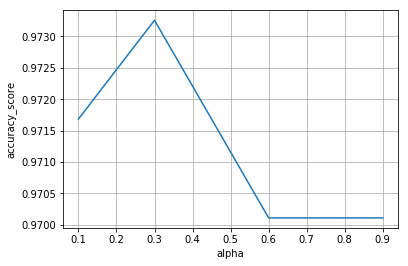

In [240]:
alpha_list=[0.1,0.3,0.6,0.9]
a=[]
for i in alpha_list:
    nb=MultinomialNB(alpha=i)
    nb.fit(numerical_train_df,y_train)
    y_pred_class=nb.predict(numerical_test_df)
    a.append(metrics.accuracy_score(y_test,y_pred_class))
plt.plot(alpha_list,a)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('accuracy_score')
    
    

Text(0,0.5,'accuracy_score')

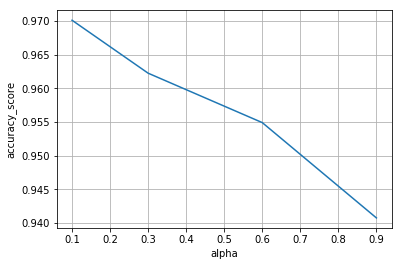

In [82]:
alpha_list=[0.1,0.3,0.6,0.9]
a=[]
for i in alpha_list:
    nb=MultinomialNB(alpha=i)
    nb.fit(numerical_train_df2,y_train)
    y_pred_class2=nb.predict(numerical_test_df2)
    a.append(metrics.accuracy_score(y_test,y_pred_class2))
plt.plot(alpha_list,a)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('accuracy_score')

In [241]:
nb=MultinomialNB(alpha=0.3)
nb.fit(numerical_train_df,y_train)
y_pred_class=nb.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9732564237021499


In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
lg=LogisticRegression()
lg.fit(numerical_train_df,y_train)
y_pred_class=lg.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9638175144205559


Text(0,0.5,'accuracy_score')

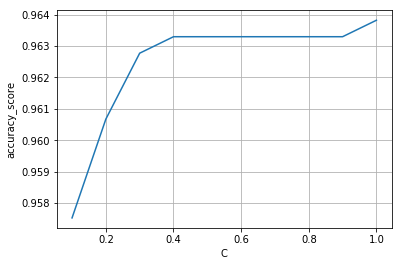

In [244]:
C_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a=[]
for i in C_list:
    lg=LogisticRegression(C=i)
    lg.fit(numerical_train_df,y_train)
    y_pred_class=lg.predict(numerical_test_df)
    a.append(metrics.accuracy_score(y_test,y_pred_class))
plt.plot(C_list,a)
plt.grid()
plt.xlabel('C')

plt.ylabel('accuracy_score')

In [98]:
lg=LogisticRegression(C=0.6)
lg.fit(numerical_train_df,y_train)
y_pred_class=lg.predict(numerical_test_df)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9315403422982885


In [245]:
lg.predict_proba(numerical_test_df)

array([[3.16810340e-04, 9.99480627e-01, 3.40365976e-05, 1.68526186e-04],
       [9.18730219e-01, 1.24617117e-02, 5.83521010e-02, 1.04559680e-02],
       [1.37405369e-02, 9.76570286e-01, 4.83163443e-04, 9.20601367e-03],
       ...,
       [1.85028954e-03, 9.96404750e-01, 4.29586221e-06, 1.74066455e-03],
       [6.58525271e-03, 1.93475474e-02, 9.70757236e-01, 3.30996421e-03],
       [9.99999654e-01, 2.92247815e-07, 1.08509418e-09, 5.26134256e-08]])

In [258]:
train_X=pd.concat([X_train,X_test],ignore_index=True,axis=0)

In [ ]:
train_X2=pd.concat([X_train,X_test],ignore_index=True,axis=0)

In [259]:
train_X.shape

(7628,)

In [265]:
train_X.tail()

7623    Anger inadequate farm loan waiver drought reli...
7624    The movie revolves around Ed Norton character ...
7625    Cook said doesnt bother primarily Android busi...
7626    While Kalank biggest opening year far soso cri...
7627    Between Tamil Nadu send highest number member ...
Name: story, dtype: object

In [262]:
X_train.head()

5733    We knew skill set required movie even though p...
6985    Blank intelligence officer played Deol nab ter...
1323    We kept private waiting right time announce pe...
5648    Brent May settlement rose 12 cent 6809 Londonb...
1859    The Rift S requires PC connection power higher...
Name: story, dtype: object

In [264]:
X_test.tail()

6690    Anger inadequate farm loan waiver drought reli...
4561    The movie revolves around Ed Norton character ...
3014    Cook said doesnt bother primarily Android busi...
4331    While Kalank biggest opening year far soso cri...
1833    Between Tamil Nadu send highest number member ...
Name: story, dtype: object

In [266]:
train_y=pd.concat([y_train,y_test],ignore_index=True,axis=0)

In [267]:
train_y.head()

0    2
1    2
2    2
3    3
4    1
Name: section, dtype: int64

In [268]:
y_train.head()

5733    2
6985    2
1323    2
5648    3
1859    1
Name: section, dtype: int64

## Now let's train our MultinomialNB with all the data available.

In [269]:
from sklearn.feature_extraction.text import CountVectorizer

In [282]:
cv=CountVectorizer()
final=cv.fit_transform(train_X)

In [283]:
cv.get_feature_names()[1:1000:25]

['000',
 '0071',
 '0154',
 '0251',
 '0415',
 '060',
 '080',
 '1000xm3',
 '1015k',
 '104900',
 '106800',
 '10990',
 '10w',
 '11101',
 '1130',
 '11525',
 '1175465',
 '11th',
 '122',
 '125000plus',
 '128238',
 '12car',
 '12year',
 '131640',
 '134',
 '1370',
 '13inch',
 '14219',
 '1473',
 '14nm',
 '1515',
 '1557',
 '15gb',
 '161116',
 '169',
 '1700',
 '173to1',
 '179',
 '1820',
 '1879']

In [284]:
final_df=pd.DataFrame(final.toarray(),columns=cv.get_feature_names())

In [285]:
final_df.shape

(7628, 36430)

In [286]:
final_df.head()

,00,000,00000,0001,0003,0004,0007,0009,001,0017,...,बहन,रत,रद,सप,सहय,हम,हमआप,இர,டம,வணக
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df2.shape

(2748, 1)

In [293]:
df2.head()

,STORY
0,2019 see gadget like gaming smartphones wearab...
1,It also unleashed wave change MCU make sure fu...
2,It confusing pick right smartphone segregated ...
3,The mobile application integrated dashboard co...
4,We rounded gadget showed 2018 left indelible m...


In [294]:
test_df=cv.transform(df2.STORY)

In [295]:
test_df=pd.DataFrame(test_df.toarray(),columns=cv.get_feature_names())

In [296]:
test_df.head()

,00,000,00000,0001,0003,0004,0007,0009,001,0017,...,बहन,रत,रद,सप,सहय,हम,हमआप,இர,டம,வணக
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
test_df.shape

(2748, 36430)

In [298]:
nb=MultinomialNB(alpha=0.3)
nb.fit(final_df,train_y)
y_pred_class=nb.predict(test_df)

In [301]:
y_pred_class[0:5]

array([1, 2, 1, 0, 1], dtype=int64)

In [302]:
submission_df=pd.read_excel('Sample_submission.xlsx')

In [303]:
submission_df.head()

,SECTION
0,3
1,3
2,3
3,3
4,3


In [304]:
submission_df.SECTION=y_pred_class

In [306]:
submission_df.SECTION.value_counts()

1    1188
2     799
0     439
3     322
Name: SECTION, dtype: int64

In [307]:
writer = 'pred.xlsx'
submission_df.to_excel(writer,sheet_name='sheet22')